In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import snscrape.modules.twitter as sntwitter
import csv
import string
from collections import Counter
#nltk.download()
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import json
import pandas as pd
#from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib as mpl
import csv
import matplotlib.pyplot as plt
import operator
from textblob import TextBlob
from textblob import Word
from textblob.sentiments import NaiveBayesAnalyzer
import re

# Twitter Developer API

In [35]:
#https://developer.twitter.com/en/portal/dashboard

API_KEY = 'JYW7WsKbVLqOnhJZd4Kqfwtfk'
API_SECRET = 'sPAUmw4DQhnb4aGmZD1B8On7Z8SJzegycAfQEM9wGL3GFwx4ni'
ACCESS_TOKEN = '900524114976296960-vBIQ0CoAWvP4kfSctnB3ejV5bJpNMqw'
ACCESS_TOKEN_SECRET = 'egd1tOSY0LYKB1fxjPTBCvPPtYMIhJmlAI6HZ7Z09Zv7j'

a = tweepy.OAuthHandler(API_KEY, API_SECRET)
a.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
API = tweepy.API(a)

# Twitter Trending Now

In [72]:
#https://www.woeids.com/ # WOEID of London
woeid = 44418
trendingnow = API.get_place_trends(id = woeid)
print("Trending now in London:")
 
for trend in trendingnow:
    trends = []
    for tr in trend['trends']:
        trends.append(tr['name'])
print(trends)    

Trending now in London:
['Mick', 'Jason Roy', '#ENGvsIND', 'Gleeson', 'Royal Aclaim', 'Fresh', '#LFCC', '#homerunderbyx', '#groundhopping', 'Trialist', '#eiduladha2022', 'Emerson', 'Vettel', 'Checo', 'Happy Eid', 'Moscow', 'Suella', 'Stevenage', 'Braverman', 'Perez', 'Archer', 'Gasly', 'Joseph Quinn', 'Firpo', 'BAME', 'Alonso', 'Grant Shapps', 'Michael Green', 'Reguilon', 'Derry', 'Sri Lanka', 'Saints', 'Anscombe', 'Sebastian Fox', 'Wigan', 'Corinne Stockheath', 'Jullien', 'Hawkeye', 'Joe Batchelor', 'Joe Aribo', 'Northern Hemisphere', 'Eid Mubarak', 'Rybakina', 'Albon', 'Kyogo', 'Andrea', 'Enciso', 'Alcohol Free', 'Wardley', 'Wales']


# Collect Tweets around area

In [37]:
import snscrape.modules.twitter as sntwitter
import csv

maxTweets = 200
#Create csv file, or append data into
text = open('London_tweets.csv', 'a', newline='', encoding='utf8')

#write tweets into csv file
textWriter = csv.writer(text)
textWriter.writerow(['id','date','username','tweet']) 

#Radius around 100 miles around the custom geo code
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('geocode:51.51147,-0.1220,100mi \
                                        + since:2022-07-01 until:2022-07-07 -filter:links -filter:replies').get_items()):
    if i > maxTweets :
            break

    textWriter.writerow([tweet.id, tweet.date, tweet.user.username, tweet.content])   
    
text.close()

# Pre-processing, Cleaning

In [54]:
text = open('London_tweets.csv', encoding='utf-8').read()

In [55]:
lower_case = text.lower()

In [57]:
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

In [58]:
# word_tokenize 
tokenized_words = word_tokenize(cleaned_text, "english")

In [59]:
# Removing Stop Words
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [60]:
# Lemmatization - From plural to single, and Base form of a word
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)      
#print(lemma_words)

## Sentiment Analysis

[' adequate', ' happy', ' free', ' happy', ' lustful', ' sad', ' attached', ' sad', ' attracted', ' obsessed', ' alone', ' fearful', ' surprise', ' alone', ' adequate', ' happy', ' sad', ' hated']
Counter({' happy': 3, ' sad': 3, ' adequate': 2, ' alone': 2, ' free': 1, ' lustful': 1, ' attached': 1, ' attracted': 1, ' obsessed': 1, ' fearful': 1, ' surprise': 1, ' hated': 1})
Positive Sentiment


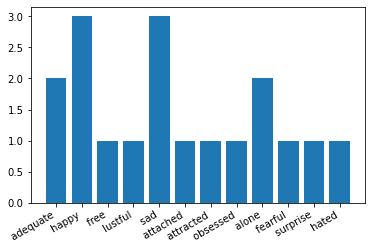

In [61]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)

print(emotion_list)
w = Counter(emotion_list)
print(w)

def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")

sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

## 5 Most Active Users

In [86]:
df = pd.read_csv('London_tweets.csv')
df = df.drop(columns = ['id','date'])
df.head(5)

,username,tweet
0,WokinghamWeatha,Temp: 18.5�C. Humidity 71% Rain today 0.0 mm. ...
1,gk3020,Sorry guys… you will have to drag me out of no...
2,_ACasso,My heart just skipped a beat seeing “The Lord ...
3,prowerrr_,Your mother could be LGBTQ\nYour father could ...
4,mylewishamilton,EU GRITEI TANTO NESSE GOL


In [63]:
df.isnull().sum()

username    0
tweet       0
dtype: int64

In [64]:
len(df)

201

In [67]:
df1 = df.drop(columns = ['username'])
df1.head(5)

,tweet
0,Temp: 18.5�C. Humidity 71% Rain today 0.0 mm. ...
1,Sorry guys… you will have to drag me out of no...
2,My heart just skipped a beat seeing “The Lord ...
3,Your mother could be LGBTQ\nYour father could ...
4,EU GRITEI TANTO NESSE GOL


In [65]:
#df['username'].unique()
userlist = df['username'].value_counts()
most_active_users = userlist.head(5)
most_active_users

pgnyash           4
Sep1914Antonio    4
SpikellaxGrimm    3
hiimsad0          3
JajaPhD           2
Name: username, dtype: int64

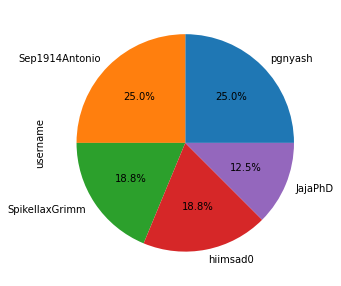

In [66]:
plot_users=most_active_users.plot.pie(autopct='%1.1f%%', figsize=(5, 5))
plt.savefig("Piechart",transparent=False, bbox_inches='tight',pad_inches=0.1)

## 5 Most Popular hastags

In [82]:
hashtg = re.findall(r"#(\w+)", lower_case)
print(hashtg)

['talkswithash', 'lagosswindler', 'canterburytales', 'lagosswindlers', 'rony', 'palmeiras', 'chelsea', 'dybala', 'milan', 'cfc', 'borisout', 'borisjohnsonmustresign', 'byeboris', 'borisjohnsonmustgo', 'borisjohnson', 'trump', 'boris', 'johnsonmustgo', 'lagosswindlers', 'lastlast', 'avax', 'mitb', 'wwesmackdown', 'nowplaying', 'tonicskaradio', 'firstplay', 'bbc6music', 'loveisland', 'timefortrump', 'topray', 'pbrisingstars', 'talkswithash', 'loveisland', 'nowplaying', 'chris', 'hortonpark', 'epsom']


In [83]:
# Lemmatization - From plural to single, and Base form of a word
lemma_w = []
for hashw in hashtg:
    hashw = WordNetLemmatizer().lemmatize(hashw)
    lemma_w.append(hashw)      
print(lemma_w)

['talkswithash', 'lagosswindler', 'canterburytales', 'lagosswindlers', 'rony', 'palmeiras', 'chelsea', 'dybala', 'milan', 'cfc', 'borisout', 'borisjohnsonmustresign', 'byeboris', 'borisjohnsonmustgo', 'borisjohnson', 'trump', 'boris', 'johnsonmustgo', 'lagosswindlers', 'lastlast', 'avax', 'mitb', 'wwesmackdown', 'nowplaying', 'tonicskaradio', 'firstplay', 'bbc6music', 'loveisland', 'timefortrump', 'topray', 'pbrisingstars', 'talkswithash', 'loveisland', 'nowplaying', 'chris', 'hortonpark', 'epsom']


# Topic extraction with LDA (Latent Dirichlet Allocation)

In [87]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=1, stop_words='english')
dtm = cv.fit_transform(df1['tweet'])
dtm

<201x1328 sparse matrix of type '<class 'numpy.int64'>'
	with 1663 stored elements in Compressed Sparse Row format>

In [88]:
#LDA
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5,random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [89]:
len(cv.get_feature_names())

1328

In [90]:
import random
for i in range(5):
    random_word_id = random.randint(0,2)
    print(cv.get_feature_names()[random_word_id])

1023
1023
1023
1023
10


In [91]:
for i in range(10):
    random_word_id = random.randint(0,2)
    print(cv.get_feature_names()[random_word_id])

10
1023
10
10
10
10
10
07
1023
07


In [92]:
LDA.components_

array([[2.19998462, 1.19776724, 0.20000155, ..., 0.20001501, 1.19997609,
        1.19997609],
       [0.20000389, 1.20062049, 1.19999378, ..., 0.20001523, 0.20000605,
        0.20000605],
       [0.20000434, 0.20001328, 0.20000175, ..., 0.20001696, 0.20000674,
        0.20000674],
       [0.20000394, 0.20001208, 0.20000159, ..., 0.20001542, 0.20000613,
        0.20000613],
       [0.20000321, 3.20158691, 0.20000133, ..., 1.19993738, 0.20000499,
        0.20000499]])

In [93]:
len(LDA.components_[0])

1328

In [94]:
single_topic = LDA.components_[0]

In [95]:
single_topic.argsort()

array([1306, 1275, 1235, ...,  832,  454, 1100], dtype=int64)

In [96]:
single_topic[183]

0.2000047383352056

In [97]:
# Top 5 words for this topic:
single_topic.argsort()[-5:]

array([ 874, 1279,  832,  454, 1100], dtype=int64)

In [98]:
top_word_indices = single_topic.argsort()[-5:]

In [116]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

rony
نمشے
que
h70
w77


In [100]:
for index,topic in enumerate(LDA.components_):
    print(f'5 Most common discussed topic #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-5:]])
    print('\n')

5 Most common discussed topic #0
['rony', 'نمشے', 'que', 'h70', 'w77']


5 Most common discussed topic #1
['really', 'man', 'meu', 'just', 'rony']


5 Most common discussed topic #2
['کے', 'eu', 'اور', 'ol97', 'time']


5 Most common discussed topic #3
['make', 've', 'um', 'life', 'jesus']


5 Most common discussed topic #4
['pop', 'don', 'wordle', '383', 'rústico']




In [101]:
dtm

<201x1328 sparse matrix of type '<class 'numpy.int64'>'
	with 1663 stored elements in Compressed Sparse Row format>

In [102]:
dtm.shape

(201, 1328)

In [103]:
topic_results = LDA.transform(dtm)

In [104]:
topic_results.shape

(201, 5)

In [105]:
topic_results[0]

array([0.01056317, 0.95782465, 0.01054463, 0.01052774, 0.01053981])

In [106]:
topic_results[0].round(2)

array([0.01, 0.96, 0.01, 0.01, 0.01])

In [107]:
topic_results[0].argmax()

1

In [108]:
df1.head()

,tweet
0,Temp: 18.5�C. Humidity 71% Rain today 0.0 mm. ...
1,Sorry guys… you will have to drag me out of no...
2,My heart just skipped a beat seeing “The Lord ...
3,Your mother could be LGBTQ\nYour father could ...
4,EU GRITEI TANTO NESSE GOL


In [109]:
topic_results.argmax(axis=1)

array([1, 0, 4, 1, 4, 2, 0, 4, 3, 2, 0, 4, 0, 1, 3, 3, 4, 1, 2, 4, 4, 2,
       2, 2, 2, 3, 4, 0, 3, 1, 0, 4, 1, 3, 3, 2, 0, 3, 4, 4, 0, 0, 1, 0,
       0, 4, 2, 2, 4, 4, 3, 2, 4, 3, 1, 0, 4, 1, 1, 1, 2, 3, 0, 4, 0, 0,
       4, 4, 4, 2, 2, 1, 3, 1, 1, 4, 4, 0, 0, 2, 1, 4, 1, 4, 3, 1, 2, 0,
       1, 2, 4, 1, 0, 2, 1, 0, 2, 4, 1, 2, 0, 2, 2, 1, 0, 1, 0, 3, 3, 0,
       4, 4, 1, 1, 0, 2, 4, 4, 0, 1, 4, 3, 1, 0, 0, 0, 3, 4, 4, 0, 3, 4,
       0, 3, 3, 0, 2, 4, 4, 1, 2, 3, 3, 1, 3, 4, 3, 2, 0, 4, 3, 3, 0, 3,
       1, 2, 0, 1, 0, 0, 1, 3, 1, 4, 3, 1, 4, 0, 0, 0, 0, 4, 4, 2, 1, 3,
       4, 4, 3, 4, 0, 4, 2, 0, 0, 3, 4, 3, 1, 0, 0, 1, 1, 1, 2, 4, 4, 4,
       0, 3, 4], dtype=int64)

In [110]:
df1['Topic'] = topic_results.argmax(axis=1)

In [111]:
df1.head(5)

,tweet,Topic
0,Temp: 18.5�C. Humidity 71% Rain today 0.0 mm. ...,1
1,Sorry guys… you will have to drag me out of no...,0
2,My heart just skipped a beat seeing “The Lord ...,4
3,Your mother could be LGBTQ\nYour father could ...,1
4,EU GRITEI TANTO NESSE GOL,4


# Topic Modeling using NMF (Non-Negative Matric Factorization)

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=1, stop_words='english')
dtm = tfidf.fit_transform(df1['tweet'])
dtm

<201x1328 sparse matrix of type '<class 'numpy.float64'>'
	with 1663 stored elements in Compressed Sparse Row format>

In [113]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=5,random_state=42)
nmf_model.fit(dtm)

NMF(n_components=5, random_state=42)

In [114]:
for index,topic in enumerate(nmf_model.components_):
    print(f'5 Most common discussed topic #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-5:]])
    print('\n')

5 Most common discussed topic #0
['bong', 'ma', 'males', '383', 'wordle']


5 Most common discussed topic #1
['pariu', 'jesus', 'golaço', 'rony', 'que']


5 Most common discussed topic #2
['results', 'problems', 'lazy', 'نمشے', 'w77']


5 Most common discussed topic #3
['tá', 'deussss', 'rony', 'deus', 'meu']


5 Most common discussed topic #4
['basic', 'live', 'truth', 'نمشے', 'h70']




In [115]:
topic_results = nmf_model.transform(dtm)
topic_results.argmax(axis=1)
df1['Topic'] = topic_results.argmax(axis=1)
df1.head(5)

,tweet,Topic
0,Temp: 18.5�C. Humidity 71% Rain today 0.0 mm. ...,1
1,Sorry guys… you will have to drag me out of no...,4
2,My heart just skipped a beat seeing “The Lord ...,4
3,Your mother could be LGBTQ\nYour father could ...,4
4,EU GRITEI TANTO NESSE GOL,1
